# Deep Learning
    Session 09
    Classification of fashion mnist data

In [1]:
# Lets import some libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'
# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 9),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('bmh')

TEST_SIZE = 0.2 # Test size

EPOCHS = 20001 # number of cycles to run
ALPHA = 0.1 # learning rate
NUM_SAMPLE = 1280
NOISE = 0.2

<Figure size 1500x900 with 0 Axes>

In [5]:
test_data = pd.read_csv("./datasets/fashion-mnist_test.csv")
train_data = pd.read_csv("./datasets/fashion-mnist_train.csv")

In [6]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
class_names = {0:"T-Shirt/Top", 
               1:"Trouser", 
               2:"Pullover", 
               3:"Dress", 
               4:"Coat", 
               5:"Sandal", 
               6:"Shirt", 
               7:"Sneaker", 
               8:"Bag", 
               9:"Ankle Boot"}

In [9]:
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [10]:
x_train = train_data.drop("label", axis=1).to_numpy()
y_train = train_data.label.to_numpy()

x_test = test_data.drop("label", axis=1).to_numpy()
y_test = test_data.label.to_numpy()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
image = []
for img in x_train:
    i = img.reshape(28,28)
    image.append(i)

In [14]:
import tensorflow as tf
import cv2

In [15]:
def build_model():
    
    model = tf.keras.Sequential([ # Assumes Input based on x_train        
        tf.keras.layers.Dense(196, activation='relu'), #Hiden1
        tf.keras.layers.Dense(49, activation='relu'), #Hiden2
        tf.keras.layers.Dense(10) #output layer        
    ])
    
    model.compile(optimizer="adam", 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])
    return model

In [17]:
model = build_model()

In [21]:
checkpoint_dir = "model"
altName = "no_frils"
#checkpoint_dir = os.path.join(modelDir, subDir)
checkpoint_prefix = os.path.join(checkpoint_dir, altName)

model_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                                    monitor="val_loss",
                                                    mode="auto",
                                                    save_weights_only=True,
                                                    save_best_only=True,
                                                    verbose=1)

In [22]:
model.fit(x_train, y_train,
          validation_data=[x_test, y_test],
          epochs=10,
          callbacks=[model_callback])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.4946 - accuracy: 0.8234
Epoch 1: val_loss improved from inf to 0.38331, saving model to model/no_frils
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4943 - accuracy: 0.8235 - val_loss: 0.3833 - val_accuracy: 0.8623
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.3672 - accuracy: 0.8660
Epoch 2: val_loss improved from 0.38331 to 0.36211, saving model to model/no_frils
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3674 - accuracy: 0.8660 - val_loss: 0.3621 - val_accuracy: 0.8655
Epoch 3/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.8763
Epoch 3: val_loss improved from 0.36211 to 0.32541, saving model to model/no_frils
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.8763 - val_loss: 0.3254 - val_accuracy: 0.8780
Epoch 4/10
1857/1875 [============================>.] - ETA: 0

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 196)               153860    
                                                                 
 dense_4 (Dense)             (None, 49)                9653      
                                                                 
 dense_5 (Dense)             (None, 10)                500       
                                                                 
Total params: 164,013
Trainable params: 164,013
Non-trainable params: 0
_________________________________________________________________


In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy: ", test_acc)

313/313 - 0s - loss: 0.3034 - accuracy: 0.8924 - 384ms/epoch - 1ms/step

Test accuracy:  0.8924000263214111


In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [26]:
prediction = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [27]:
prediction.shape

(10000, 10)

In [28]:
prediction[0]

array([8.7124574e-01, 1.9081343e-10, 2.9890164e-04, 2.6776306e-06,
       5.7683083e-06, 2.2926749e-11, 1.2844644e-01, 7.1602095e-12,
       3.1310688e-07, 5.5941617e-14], dtype=float32)

In [29]:
prediction[0].sum()

0.9999998

In [31]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'model/no_frils'

In [33]:
#Create a new model instance
model1 = build_model()

#Load the previously saved
model1.load_weights(latest)

#Re-evalute the model
loss, acc = model1.evaluate(x_test, y_test, verbose=2)
print("Restored model, acuracy: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 0.2951 - accuracy: 0.8933 - 556ms/epoch - 2ms/step
Restored model, acuracy: 89.33%


In [34]:
y_pred = model1.predict(x_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[ 8.3866186e+00, -1.1366138e+01,  2.4241567e+00, ...,
        -1.3994049e+01, -3.7100041e+00, -1.8618967e+01],
       [-1.8587023e-01,  1.9728958e+01, -2.7507231e+00, ...,
        -2.3650406e+01, -9.1139412e+00, -1.5447335e+01],
       [ 1.1348173e-02, -5.1782479e+00,  5.1649442e+00, ...,
        -1.2423360e+01, -1.8641676e+00, -1.2604660e+01],
       ...,
       [-1.2156521e+01, -2.1205404e+01, -1.8589165e+01, ...,
        -1.8394903e+01,  1.9457886e+01, -3.3673412e+01],
       [ 2.1468351e+00, -8.2303009e+00, -3.1364441e-02, ...,
        -1.3379892e+01,  8.1465330e+00, -1.8607187e+01],
       [-8.4106065e-03,  4.3127270e+00,  1.4810603e+00, ...,
        -1.2436692e+01, -2.3933475e+00, -1.0903602e+01]], dtype=float32)

In [35]:
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
cm

array([[877,   0,  13,  11,   0,   0,  88,   0,  11,   0],
       [  4, 985,   1,   8,   1,   0,   0,   0,   1,   0],
       [ 12,   0, 854,   5,  65,   0,  59,   0,   5,   0],
       [ 43,  12,  16, 866,  49,   1,  12,   0,   1,   0],
       [  0,   0,  97,  17, 837,   0,  49,   0,   0,   0],
       [  1,   0,   1,   0,   0, 945,   0,  37,   1,  15],
       [162,   1,  91,  10,  51,   0, 674,   0,  11,   0],
       [  0,   0,   0,   0,   0,  12,   0, 960,   0,  28],
       [  4,   0,   4,   1,   2,   2,   3,   2, 982,   0],
       [  0,   0,   0,   0,   0,   8,   0,  38,   1, 953]])

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

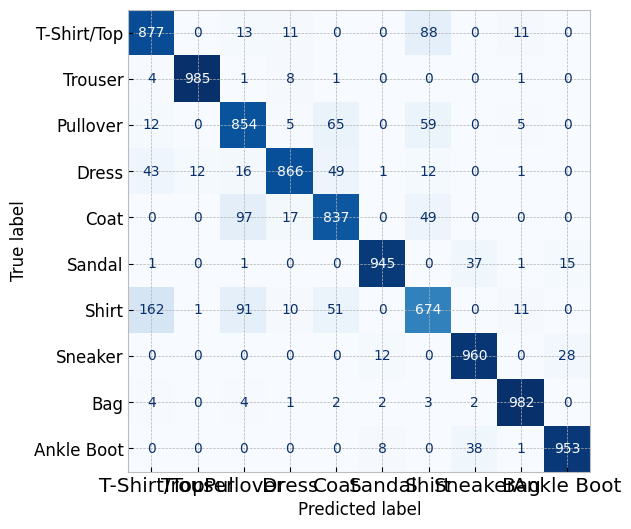

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names.values())
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.show()